In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Heart Disease Data

- The ultimate goal for this problem is to predict whether the observation has heart problems or not.
- See attributes.txt for more information of each feature.
- I'll divide the problem in different notebooks, first exploratory, then some feature engineering to add some features, then training the models and finally implementing the model in some way.

In [33]:
data = pd.read_csv('heart.csv')

In [34]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


We can see data set has very little observations. This might affect training since models cant learn from a lot of data.\
I think simple models will work best here considering the amount of data.

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


No null values and columns types are ok

In [36]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

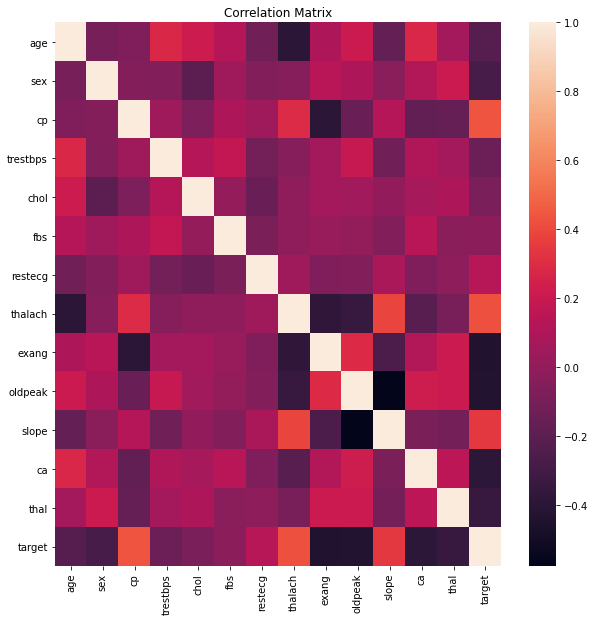

In [37]:
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(data.corr(),cmap="rocket").set_title('Correlation Matrix')

In [38]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


we can see cp and thalach have somewhat high positive correlation with the target. Exang, oldpeak, ca and thal have negative correlation. These values might affect
the prediction a lot more than the other features. We can see some correlations between features, but i'll focus on correlations between features and target.

In [39]:
data.age.value_counts()[data.age.value_counts() > 9]

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
41    10
64    10
Name: age, dtype: int64

Text(0.5, 1.0, 'Age by sex')

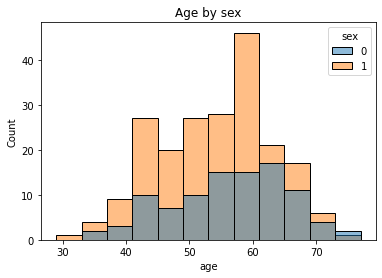

In [40]:
sns.histplot(x = data.age, data = data , hue = 'sex').set_title('Age by sex')

Text(0.5, 1.0, 'Age by heart problems')

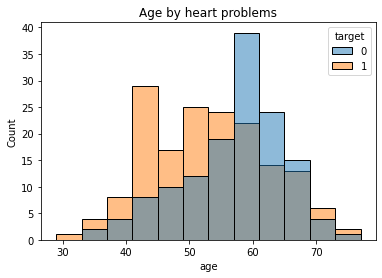

In [41]:
sns.histplot(x = data.age, data = data , hue = 'target').set_title('Age by heart problems')

Since i dont have more information on sex column, i'll assume sex = 1  means male, and 0 means female. Before exploring the sex column we can see the dataset has more men than women in the first graph. Second graph show us younger people have higher chance of having heart problems than older people, 40 to 55 have more chance than 60 to 70 for example. I think this is because older people with heart problems are either not in the data set, or they die because of the heart problem so they do not appear. 

In [42]:
data.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [43]:
data[['cp','target']].groupby('cp').describe()

target                                             
    count      mean       std  min  25%  50%  75%  max
cp                                                    
0   143.0  0.272727  0.446927  0.0  0.0  0.0  1.0  1.0
1    50.0  0.820000  0.388088  0.0  1.0  1.0  1.0  1.0
2    87.0  0.793103  0.407429  0.0  1.0  1.0  1.0  1.0
3    23.0  0.695652  0.470472  0.0  0.0  1.0  1.0  1.0

with cp (chest pain) at 0, the target being 1 is a lot less frecuent than on higher cp values. This confirms the correlation matrix

Text(0.5, 1.0, 'Chest pain frecuency')

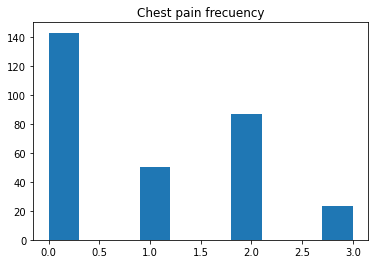

In [44]:
plt.hist(data.cp)
plt.title('Chest pain frecuency')

Next is thalach values. This, like cp, should have target = 1 more frecuent at higher levels.

Text(0.5, 1.0, 'Thalach Density with target values')

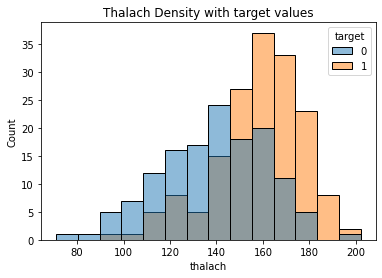

In [45]:
sns.histplot(x = data.thalach, data = data , hue = 'target').set_title("Thalach Density with target values")

Text(0.5, 1.0, 'Thalach boxplots with target values')

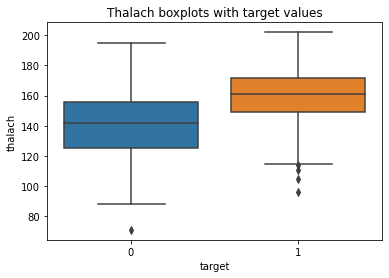

In [46]:
sns.boxplot(y = data.thalach , x = data.target).set_title("Thalach boxplots with target values")

higher thalach means target = 1 more frecuent than at lower thalach values

In [47]:
data.exang.value_counts()

0    204
1     99
Name: exang, dtype: int64

Text(0.5, 1.0, 'Exang frecuency')

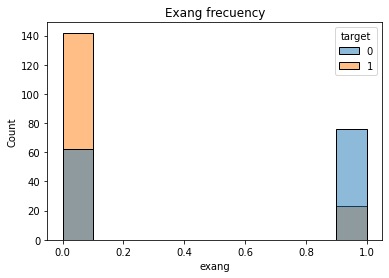

In [48]:
sns.histplot(x = data.exang, data = data , hue = 'target').set_title("Exang frecuency") 

we can see exang at 0 almost doubles exang at 1 observations. We can also see at exang = 0,  target being 1 is more frecuent, as we saw in the negative correlation this feature has with the target. 

Text(0.5, 1.0, 'Oldpeak frecuency with target value')

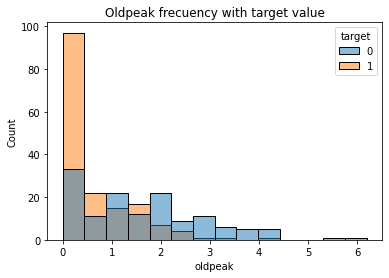

In [49]:
sns.histplot(x = data.oldpeak, data = data , hue = 'target').set_title ('Oldpeak frecuency with target value')

Text(0.5, 1.0, 'Oldpeak boxplots with target values')

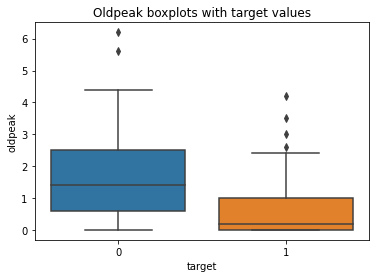

In [50]:
sns.boxplot(y = data.oldpeak , x = data.target).set_title("Oldpeak boxplots with target values")

higher Oldpeak means target = 0 more frecuent. We can see this in both graphs.

In [51]:
(data.oldpeak > 4).sum()

5

Outliers are almost non-existant in the data set so i won't eliminate them.

In [52]:
data.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

Text(0.5, 1.0, 'Ca frecuency')

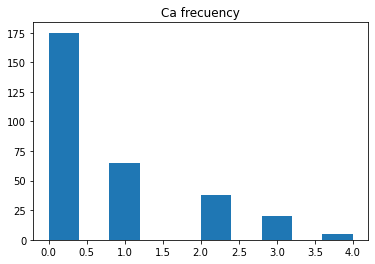

In [53]:
plt.hist(data.ca)
plt.title("Ca frecuency")

In [54]:
data.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

Text(0.5, 1.0, 'Thal frecuency')

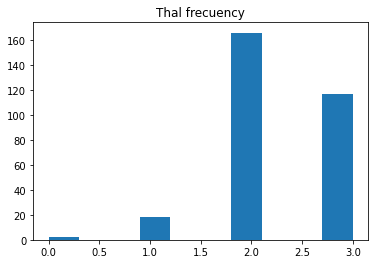

In [55]:
plt.hist(data.thal)
plt.title("Thal frecuency")

Lastly lets see if target is balanced and can use accuracy as a measurment or i need another score.

In [56]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Data set is balanced so accuracy can be a good measurment. I could say recall and precision would be better measurments since i want to have more false negatives and more true positives, since predicting heart problems is better than telling someone healthy he has heart problems and discarding that in future exams, but since data set has quite small ammount of observations and this is not a real world problem i'll just use accuracy when seelcting models to use

### Feature importance

Next i'll use a random forest and Extra trees to see which features would be important in a classification problem, to have an idea what to expect from the model.

In [57]:
X = data.loc[:, data.columns != "target"]
Y = data.target

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

rf = RandomForestClassifier (n_jobs = -1 )
et = ExtraTreesClassifier ( n_jobs = -1  )

rf.fit(X,Y)
et.fit(X,Y)

ExtraTreesClassifier(n_jobs=-1)

<AxesSubplot:>

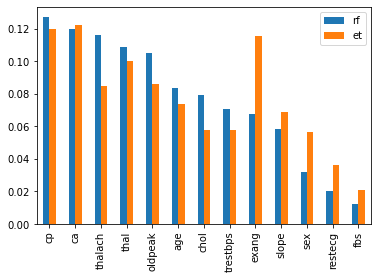

In [59]:
imp = pd.DataFrame({"rf" : rf.feature_importances_ , "et" : et.feature_importances_}).sort_values(['rf'],ascending = False)
names = X.columns[imp.index]
imp.index = names
imp.plot(kind = "bar")

As i said earlier, cp, thalach, thal, oldpeak and ca are the most important ones for predicting. This matches the correlation matrix

### Graph with some dimensionality reduction

Next i'll use PCA and some manfold models to reduce dimensionality on data set and plot it in a graph. I'll see if i can get some usefull data out of it

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(data)

In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_trans = pca.fit_transform(data)

In [62]:
graphDf = pd.DataFrame(data = pca_trans
             , columns = ['principal component 1', 'principal component 2'])
graphDf = pd.concat([graphDf, data[['target']]], axis = 1)

Text(0.5, 1.0, 'PCA Graph')

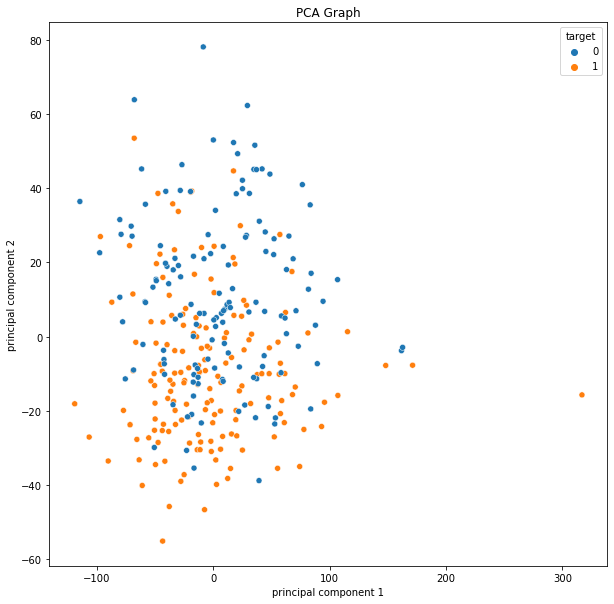

In [63]:
fig = plt.figure(figsize = (10,10))
ax = sns.scatterplot(x=graphDf["principal component 1"], y=graphDf["principal component 2"],data = graphDf,hue = graphDf.target)
ax.set_title("PCA Graph")

In [64]:
from sklearn.manifold import Isomap
Isomap = Isomap(n_components=2)
Isomap_trans = Isomap.fit_transform(data)

graphDf = pd.DataFrame(data = Isomap_trans
             , columns = ['component 1', 'component 2'])
graphDf = pd.concat([graphDf, data[['target']]], axis = 1)

Text(0.5, 1.0, 'isomap Graph')

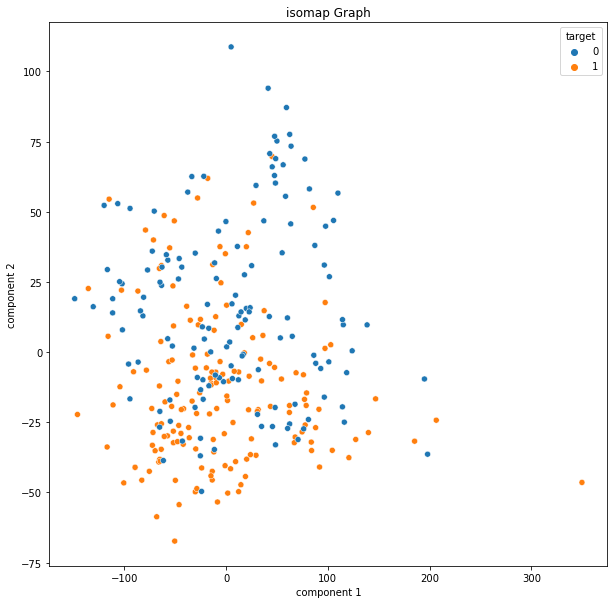

In [65]:
fig = plt.figure(figsize = (10,10))
ax = sns.scatterplot(x=graphDf["component 1"], y=graphDf["component 2"],data = graphDf,hue = graphDf.target)
ax.set_title("isomap Graph")

In [66]:
from sklearn.manifold import TSNE
TSNE = TSNE(n_components=2)
TSNE_trans = TSNE.fit_transform(data)

graphDf = pd.DataFrame(data = TSNE_trans
             , columns = ['component 1', 'component 2'])
graphDf = pd.concat([graphDf, data[['target']]], axis = 1)

Text(0.5, 1.0, 'TSNE Graph')

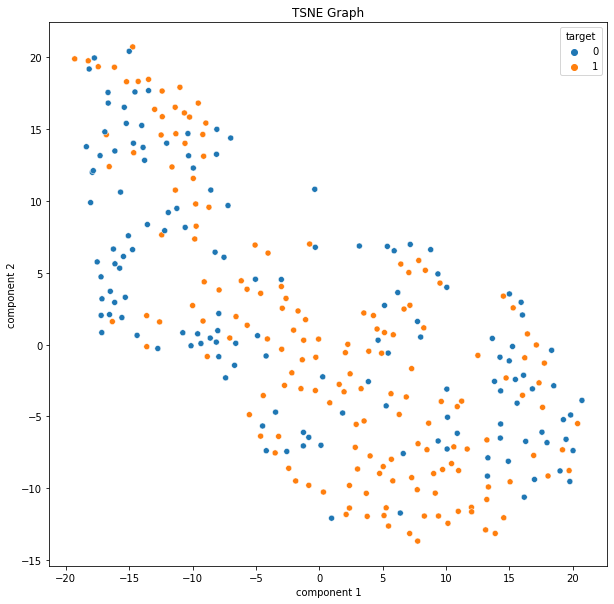

In [67]:
fig = plt.figure(figsize = (10,10))
ax = sns.scatterplot(x=graphDf["component 1"], y=graphDf["component 2"],data = graphDf,hue = graphDf.target)
ax.set_title("TSNE Graph")

### Finally a SOM 

I'll use a self organizing map to reduce dimensionality and see if i can get some usefull insight.
Each square in the graph is a main node.\
The darker the square means the observations associated with those nodes are closer to each other, therefore are similar.\
With this we can say the white squares are nodes which associated observations are different from each other, so we can say this observations may not be normal in the dataset.

In [68]:
X = data.iloc[:, :-1].values 
y = data.iloc[:, -1].values

In [69]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [70]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 13, sigma= 1.0, learning_rate = 0.1) 
som.random_weights_init(X) 
som.train_random(data = X, num_iteration = 500) 

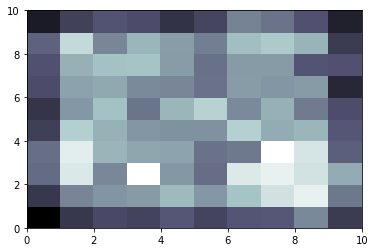

In [71]:
from pylab import bone, pcolor, colorbar, plot, show
bone() 
pcolor(som.distance_map().T)                    
show() 

In [73]:
Mappings = som.win_map(X)
Different = np.concatenate((Mappings[(3,2)], Mappings[(7,3)]), axis = 0)
Different = sc.inverse_transform(Different)

In [74]:
print('Abnormal Patients')
abnormal = []
for i in Different[:, 0]:    
  print(int(i))
  abnormal.append(i)

Abnormal Patients
61
43
55
66
58
57
42
52
44


In [75]:
data.iloc[abnormal,:] 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
61,54,1,1,108,309,0,1,156,0,0.0,2,0,3,1
43,53,0,0,130,264,0,0,143,0,0.4,1,0,2,1
55,52,1,1,134,201,0,1,158,0,0.8,2,1,2,1
66,51,1,2,100,222,0,1,143,1,1.2,1,0,2,1
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2,1
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2,1
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1
